# Homework 10: Bootstrap

## Logistics

**Due date**: The homework is due 17:00 (5:00pm) on Tuesday, March 26.

You will submit your work on [MarkUs](https://markus-ds.teach.cs.toronto.edu).
To submit your work:

1. Download this file (`Homework_10.ipynb`) from JupyterHub. (See [our JupyterHub Guide](../../../guides/jupyterhub_guide.ipynb) for detailed instructions.)
2. Submit this file to MarkUs under the **hw10** assignment. (See [our MarkUs Guide](../../../guides/markus_guide.ipynb) for detailed instructions.)

## Introduction

For this week's homework, we will look at the median percentage of coral coverage over all of the quadrats sampled in the `LTER` data. We will analyze data coming from six sites within a coral reef French Polinesia, from 2005 to 2022. Throughout these sites, with a quadrat sampling design along transects, percentage cover of corals, macroalgae, microalgae and sand were estimated across different depths and temperatures.

## Question

_General Question: What is the distribution of the percentage of coral coverage in each of the quadrats? Can we provide an range that does a good job of estimating the median of the percentage of coral coverage?_


## Instructions and Learning Objectives

You will be creating and submitting a data story answering a data science question. 

In this homework, you will:
* Create a data story in a notebook exploring the question.
* Work with the Moorea Coral reef Long-term ecological research dataset to investigate changes in biodiversity as temperature changes.
* Visualize and analyze the distribution of the percentage of coral coverage
* Create a 95% confidence interval for the median percentage of coral coverage.

## Setup

First import `numpy`, `pandas`, and `matplotlib` by running the cell below.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Then fill in your student number to use as a random seed.

In [1]:
# Please fill in this cell with your student number (as an int)

student_number = 1000000

assert type(student_number) == int, "Did you fill in the student_number variable correctly?"

## Data section

The this part of your notebook should read the raw data, extract a `DataFrame` containing the important columns, rename the columns, and filter out missing values.

You might find it helpful to name intermediate values in your algorithms - e.g., `corals_data.head()`, `corals_clean.head()`. That way you can examine them to make sure they have the type you expect and that they look like what you expect. Very helpful when debugging!

Create the following pandas `DataFrame`s:

+ `corals_data`: the `DataFrame` created by reading in the `LTER_data.csv` file.

+ `corals_clean`: the `DataFrame` with column names converted to 'snake case' format using `<columns>.str.lower()`, `<columns>.str.replace()`, and `<columns>.str.strip()`. [Snake cases](https://en.wikipedia.org/wiki/Snake_case) uses fully lowercase letters and underscores instead of spaces. It is the [recommended naming convention](https://peps.python.org/pep-0008/#function-and-variable-names) for Python.  For example, if we have the column name: "Tomo is a Great prof  ", the snake case equivalent would be 'tomo_is_a_great_prof'. Furthermore, we will replace the following symbols to the corresponding symbols/text:symbols/text: 
    * " " with "_",
    * "%" to "percent"
    * "metres" to "m"
    * "celsius" to "c"
    * "temperature" to "temp"

    Check that your column names are correct using `print(list(corals_clean.columns))`.
    
+ `corals_select_data`: the `DataFrame` with the only following columns selected:
    + `site`
    + `year`
    + `corals_percent`

    These columns will be relevant to this week's anlaysis.

In [4]:
# SOLUTION
corals_data = pd.read_csv("LTER_data.csv")

corals_clean = corals_data.copy()


co_columns = corals_clean.columns

co_columns_clean = co_columns.str.lower().str.replace(
    " ", "_").str.replace(
    "%", "percent").str.replace(
    "metres", "m").str.replace(
    "celsius", "c").str.replace(
    "temperature", "temp").str.strip("_")

corals_clean.columns = co_columns_clean

print(list(corals_clean.columns))

corals_select_data = corals_clean[["site",
                                   "year",
                                   "corals_percent"]]

corals_select_data.head()

['site', 'quadrat', 'year', 'depth_m', 'temp_c', 'sand_percent', 'macroalgae_percent', 'microalgae_percent', 'corals_percent']


,site,year,corals_percent
0,LTER01,2005,77.5
1,LTER02,2005,97.4
2,LTER03,2005,33.2
3,LTER04,2005,21.5
4,LTER05,2005,95.8


## Exploring the data

Create a histogram of the percentage of coral coverage. You do not need to store the result in a variable.

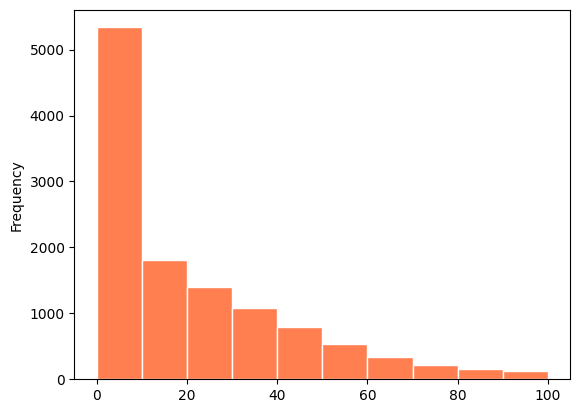

In [5]:
corals_select_data["corals_percent"].plot.hist(color="coral", edgecolor="white");

Comment on the shape of the histogram and the distribution of the coral percentage. What is a better representation of the centre of the data, the mean or the median? Why? **(2 marks)**

> **Sample answer**
> 
> The percentage of the coral coverage is right-skewed, unimodal, and has a range of 0 to 100%. There is a peak between 0 and 10.
>
> Since percentage of the coral coverage is skewed, the median would be a better representation of the center of the data.
> 

Compute the the median percentage of the coral coverage, and store the result in a variable called `median_coverage`. Then compute the mean percentage of coral coverage, and store the result in a variable called `mean_coverage`.

In [6]:
median_coverage = corals_select_data["corals_percent"].median()
mean_coverage = corals_select_data["corals_percent"].mean()

print(median_coverage)
print(mean_coverage)

12.5
20.459058524173027


## Method: Bootstrap Confidence Interval

Here we will run a bootstrap to estimate resampling technique by:
+ creating a resampling function that calculates the median of a resample
+ running the resampling function multiple times and having multiple resample medians
+ getting the 2.5% and 97.5% percentiles of all of our resample medians to get a 95% confidence interval.


Create a function called `one_bootstrap_med()` which will take one argument `data` (a `DataFrame`), resample the `corals_percent` column of `data`, and calculate and return the median of the new sample.

In [7]:
## SOLUTION
def one_bootstrap_med(data):
    boot_med = data["corals_percent"].sample(
        frac=1, replace=True).median()
    return boot_med

Now compute 10,000 bootstrap medians by writing a for loop. Use your student number as a seed prior to running the bootstrap. Save the medians as a list in a variable called `bootstrap_medians`.

In [8]:
# The following line of code uses your student number to set a random seed.
# This ensures that every time you run this cell, you'll get the same result.
# Do not modify this line of code!
np.random.seed(student_number)

# SOLUTION

bootstrap_medians = []  # empty list to collect medians

for _ in range(10000):
    bootstrap_medians.append(one_bootstrap_med(corals_select_data))

Create a histogram of the 10,000 bootstrap median coral coverage percentages. You do not need to store the result in a variable.

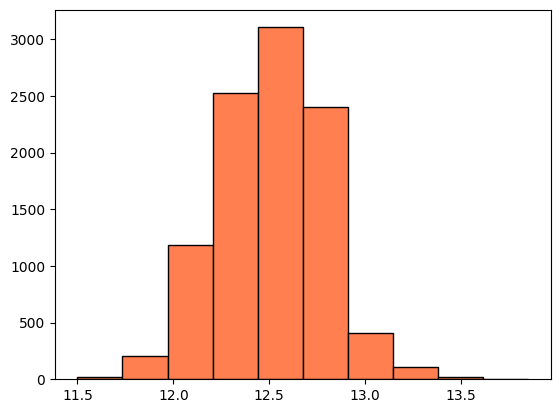

In [9]:
## SOLUTION
plt.hist(bootstrap_medians, color="coral", edgecolor="black");

Calculate the lower bound and upper bound of the 95% confidence intervals for the median percentage of coral coverage in a given quadrat. Save these values as `lower_bound` and `upper_bound`, respectively.

In [10]:
## Solution Lower bound 
lower_bound = np.percentile(bootstrap_medians, 2.5)

In [11]:
## Solution Upper bound
upper_bound = np.percentile(bootstrap_medians, 97.5)

In [12]:
# Check the computed values
print(lower_bound)
print(upper_bound)

12.0
13.1


## Conclusion

Provide a 1-2 sentence explanation of what the 95% confidence interval represents. __(1 mark)__


> **Sample Solution**
> 
> We are 95% confident that the median coral percentage of all quadrats is between 12% and 13.1%.